<a href="https://colab.research.google.com/github/jdanielgonzalez/Tarea-RNA/blob/main/Tarea_m%C3%B3dulo_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Configuración framework y base de datos***

##Conectamos con Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Instalar librerias necesarias

In [3]:
!pip install pandas openpyxl #instalar libreria pandas


##Importar librerias necesarias

In [78]:
import pandas as pd #importar la libreria pandas
import matplotlib.pyplot as plt #libreria para poder
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from statistics import median




##Definir ruta de archivo XLSX

In [12]:
# ruta del archivo
ruta_archivo = '/content/drive/MyDrive/UDEA/semestre 2023-2/inteligencia computacional/tarea1/DatosconClases.xlsx'

##Leer el archivo

In [98]:
# Leer el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta_archivo, engine='openpyxl')

# Mostrar las primeras filas del DataFrame
df.head()

,Area,Esqueleto,Excentricidad,Contraste,Correlacion,Energia,Homogeneidad,PuntosExtremo,Intersecciones,bias,Genero,Clase Entrega 1,Clase Entrega 2,Clase Entrega 3
0,0.432874,0.200151,0.000000,0.201714,0.731900,0.257199,0.768087,0.047059,0.047059,1,Artiodactyla,1,1,1
1,0.557096,0.300579,1.000000,0.225551,0.691934,0.247544,0.740691,0.098039,0.098039,1,Artiodactyla,1,1,1
2,0.887632,0.450976,0.000000,0.205783,0.907211,0.104082,0.763409,0.137255,0.137255,1,Artiodactyla,1,1,1
3,0.656452,0.359743,0.000000,0.147204,0.848253,0.204114,0.830763,0.101961,0.101961,1,Artiodactyla,1,1,1
4,0.406779,0.204640,0.929951,0.211618,0.716869,0.271146,0.756700,0.047059,0.047059,1,Artiodactyla,1,1,1


## Funciones a usar

In [14]:
# Función para imprimir la opción seleccionada
def graficar_prediciones_ajustadas(change):
    with output:
      print(change.new)
      #seleccionar umbral si es hacia arriba o hacia abajo
      if change.new == "arriba":
         predicciones_ajustadas = [2 if valor >= min(predicciones[0:3]) else 1 for valor in predicciones]
      else:
         predicciones_ajustadas = [2 if valor <= max(predicciones[0:3]) else 1 for valor in predicciones]


      # graficar prediciones vs datos de prueba
      plt.figure(figsize=(10, 6))
      plt.plot(indices, y_test, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
      plt.plot(indices, predicciones_ajustadas, marker='o', linestyle='--', color='g', label='Predicciones ajustadas')
      plt.xlabel('Ejemplos')
      plt.ylabel('Valores')
      plt.title('Comparación entre Predicciones y Etiquetas Reales')
      plt.legend()
      plt.grid(True)
      plt.show()

      # Supongamos que tienes los vectores predicciones_ajustadas y y_test
      predicciones_correctas = sum(predicciones_ajustadas == y_test)
      total_predicciones = len(y_test)

      # Calcular el porcentaje de error
      porcentaje_error = (total_predicciones - predicciones_correctas) / total_predicciones * 100
      print("Porcentaje de Error:", porcentaje_error, "%")


# Función para imprimir la opción seleccionada
def graficar_prediciones_ajustadas_percetron(change):
    with output:
      print(change.new)
      #seleccionar umbral si es hacia arriba o hacia abajo
      if change.new == "arriba":
         predicciones_ajustadas = [-1 if valor >= min(predicciones[0:3]) else 1 for valor in predicciones]
      else:
         predicciones_ajustadas = [-1 if valor <= max(predicciones[0:3]) else 1 for valor in predicciones]


      # graficar prediciones vs datos de prueba
      plt.figure(figsize=(10, 6))
      plt.plot(indices, y_test, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
      plt.plot(indices, predicciones_ajustadas, marker='o', linestyle='--', color='g', label='Predicciones ajustadas')
      plt.xlabel('Ejemplos')
      plt.ylabel('Valores')
      plt.title('Comparación entre Predicciones y Etiquetas Reales')
      plt.legend()
      plt.grid(True)
      plt.show()

      # Supongamos que tienes los vectores predicciones_ajustadas y y_test
      predicciones_correctas = sum(predicciones_ajustadas == y_test)
      total_predicciones = len(y_test)

      # Calcular el porcentaje de error
      porcentaje_error = (total_predicciones - predicciones_correctas) / total_predicciones * 100
      print("Porcentaje de Error:", porcentaje_error, "%")


# Función para imprimir la opción seleccionada
def graficar_caracteristicas(change):
    with output:
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.xlabel('Índice')
        plt.ylabel(change.new)  # Etiqueta del eje y con el nombre de la columna seleccionada
        plt.title(f'Gráfico de {change.new} por Clase')
        plt.grid(True)

        if change.new in df.columns:
            # Verificar si la columna seleccionada existe en el DataFrame
            if 'Clase Entrega 1' in df.columns:
                # Verificar si la columna "Clase Entrega 1" existe en el DataFrame
                df_1 = df[df["Clase Entrega 1"] == 1]
                df_2 = df[df["Clase Entrega 1"] == 2]
                plt.plot(df_1.index, df_1[change.new], color='blue', marker='o', linestyle='-', label='Mamifero')
                plt.plot(df_2.index, df_2[change.new], color='red', marker='o', linestyle='-', label='Ave')
                plt.legend()
            else:
                print("La columna 'Clase Entrega 1' no existe en el DataFrame.")
        else:
            print(f"La columna '{change.new}' no existe en el DataFrame.")

        plt.show()

# ***Analisis de los datos***

##Visualizar cada columna de los archivos

In [15]:
# Obtener la lista de columnas del DataFrame
n_columnas = df.columns.values

# Crear la lista desplegable
dropdown = widgets.Dropdown(
    options=n_columnas,
    description='Selecciona una columna:'
)

# Crear un espacio para la salida
output = widgets.Output()

# Conectar el controlador de eventos a la lista desplegable
dropdown.observe(graficar_caracteristicas, names='value')

# Mostrar la lista desplegable
display(dropdown, output)

Dropdown(description='Selecciona una columna:', options=('Area', 'Esqueleto', 'Excentricidad', 'Contraste', 'C…

Output()

## Matriz de correlación

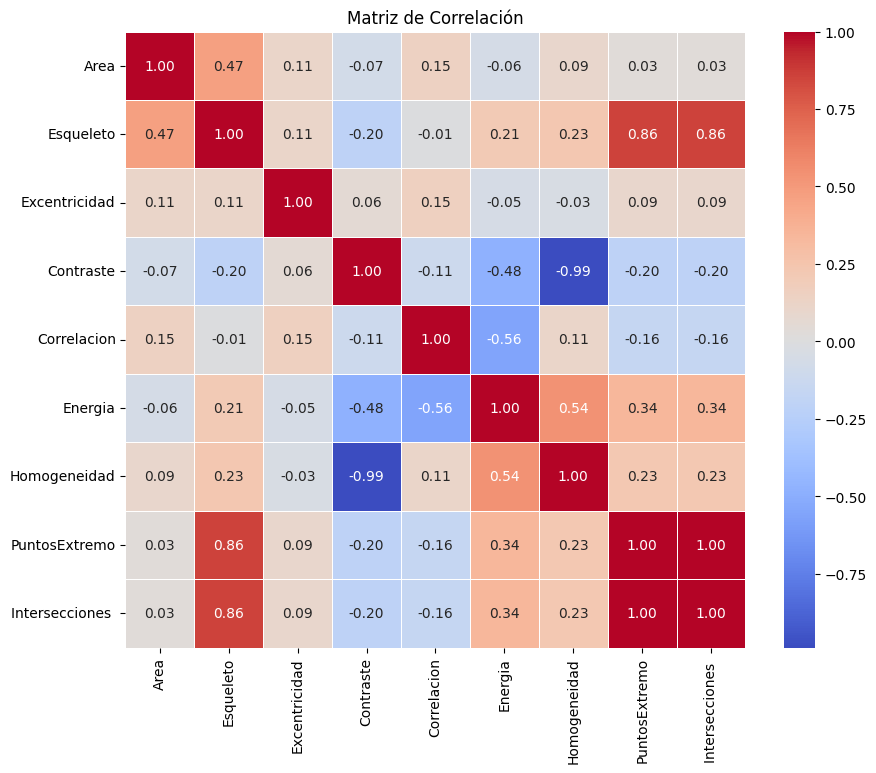

In [16]:
#Excluir colimnas innecesarias
columns_to_exclude = ['Clase Entrega 1', 'Clase Entrega 2', 'Clase Entrega 3', 'bias']
df_filtered = df.drop(columns=columns_to_exclude)

# Calcular la matriz de correlación
correlation_matrix = df_filtered.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## Diagrama de CaJa

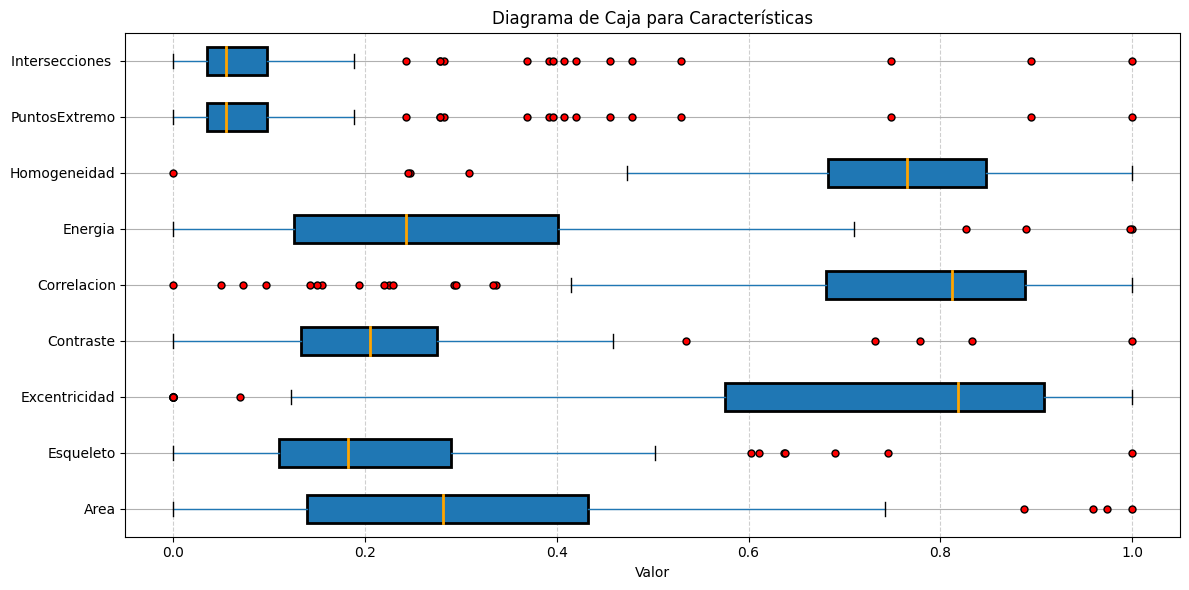

In [17]:
#Excluir colimnas innecesarias
columns_to_exclude = ['Clase Entrega 1', 'Clase Entrega 2', 'Clase Entrega 3', 'bias']
df_filtered = df.drop(columns=columns_to_exclude)

# Seleccionar solo las columnas numéricas (excluyendo las columnas no numéricas)
columnas_numericas = df_filtered.select_dtypes(include=['number'])

# Colores para los boxplots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'brown', 'grey', 'gold']

# Crear un gráfico de boxplot personalizado para las columnas numéricas
plt.figure(figsize=(12, 6))
boxprops = dict(linewidth=2, color='black')  # Propiedades del contorno de las cajas
medianprops = dict(linestyle='-', linewidth=2, color='orange')  # Propiedades de la línea de la mediana
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')  # Propiedades de los valores atípicos
columnas_numericas.boxplot(vert=False, patch_artist=True, boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
plt.title('Diagrama de Caja para Características')
plt.xlabel('Valor')
plt.yticks(range(1, len(columnas_numericas.columns) + 1), columnas_numericas.columns)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Depurar Base de datos solo con las columnas que necesitamos

In [99]:
columnas_deseadas = ["Area", "Contraste", "Correlacion", "Energia", "PuntosExtremo", "bias", "Genero", "Clase Entrega 1", "Clase Entrega 2", "Clase Entrega 3"]
df = df[columnas_deseadas]

##Creamos vectores de entarda y salidad

se crean los vectores de entrada y salidad, pero se dividen en dos los de entrenamiento y los de prueba.

In [108]:
# Separar el DataFrame en dos DataFrames basados en la columna "Clase Entrega 1"
df_mamifero = df[df["Clase Entrega 1"] == 1]
df_ave = df[df["Clase Entrega 1"] == 2]

# Definir el tamaño del conjunto de prueba (90% entrenamiento, 10% prueba)
test_size = 0.2

# Obtener el número de filas para el conjunto de prueba
num_rows_test_mamifero = int(len(df_mamifero) * test_size)
num_rows_test_ave = int(len(df_ave) * test_size)

# Dividir en conjuntos de entrenamiento y prueba
train_df_mamifero = df_mamifero.iloc[num_rows_test_mamifero:]
test_df_mamifero = df_mamifero.iloc[:num_rows_test_mamifero]

train_df_ave = df_ave.iloc[num_rows_test_ave:]
test_df_ave = df_ave.iloc[:num_rows_test_ave]

#juntar conjunto de entrenamiento
frames_train = [train_df_ave, train_df_mamifero]
frames_test = [test_df_ave, test_df_mamifero]
df_train = pd.concat(frames_train, ignore_index=True)
df_test = pd.concat(frames_test, ignore_index=True)

# Seleccionar las columnas para x_train Y x_test
columnas_x = ["Area", "Contraste", "Correlacion", "Energia", "PuntosExtremo", "bias"]
x_train = df_train[columnas_x].to_numpy()[:32]
x_test = df_test[columnas_x].to_numpy()

# Seleccionar la columna para y_train y y_test
columna_y = "Clase Entrega 1"
y_train = df_train[columna_y].to_numpy()[:32]
y_test = df_test[columna_y].to_numpy()



# ***Punto 1 LMS***

Pesos finales: [-0.77866777  0.3683005   0.06727324  0.64149284 -0.64668554  1.45915209]
Accuracy entrenamiento: 68.75 %
Accuracy prueba: 100.0 %


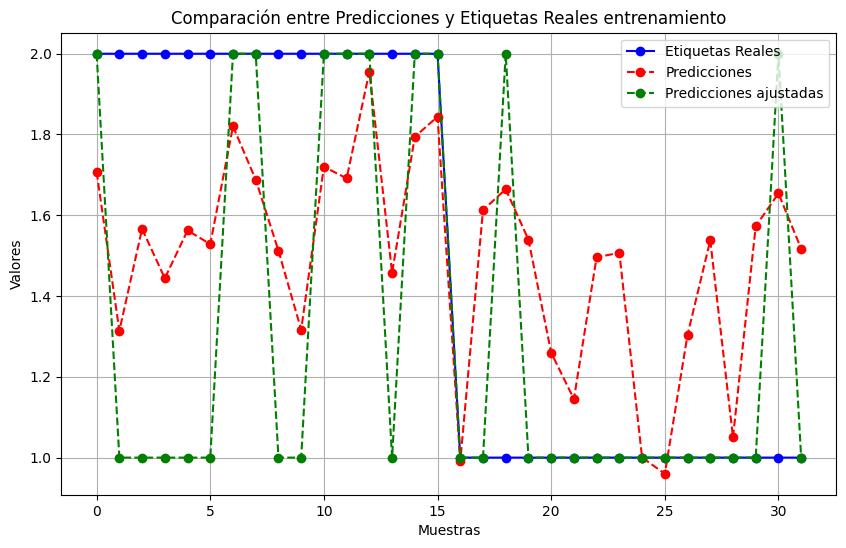

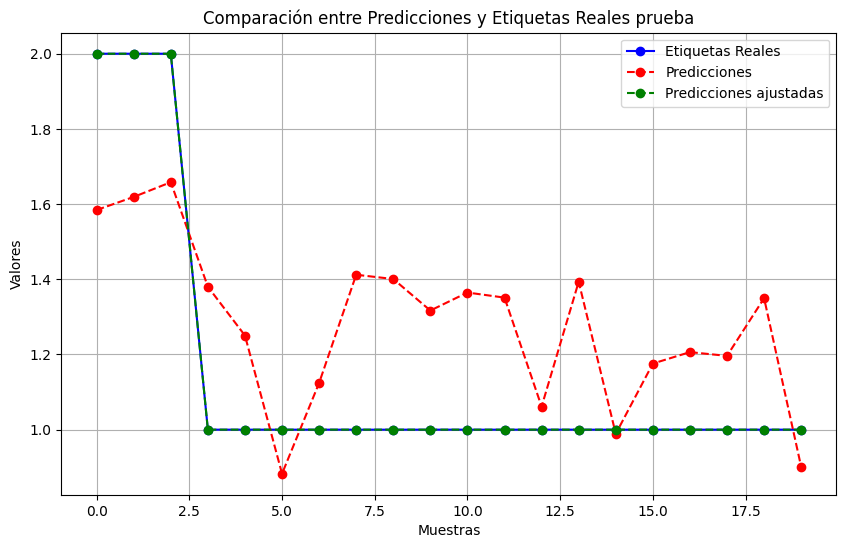

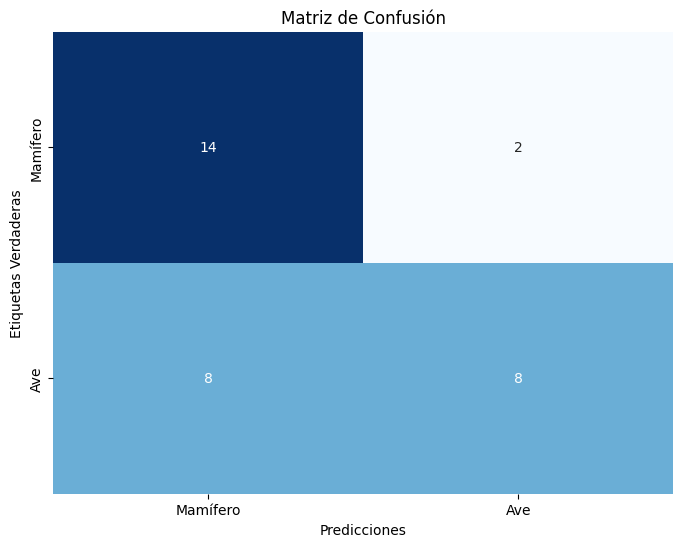

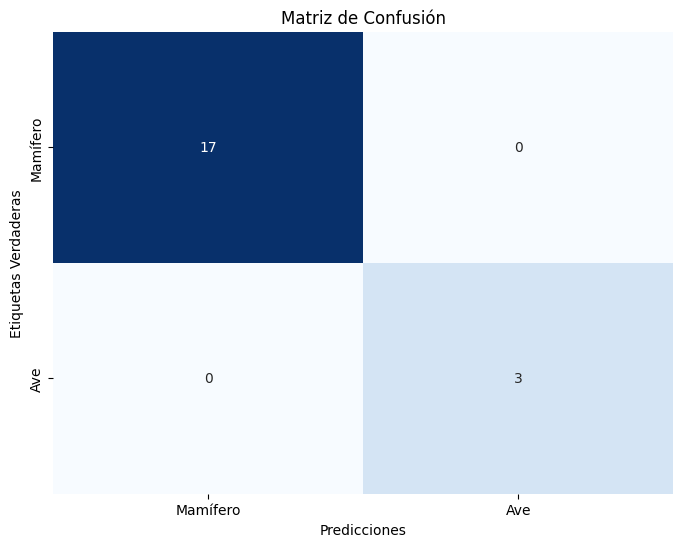

In [87]:
w = np.random.uniform(0, 1, len(x_train[0]))  # Inicializados pesos aleatoriamente
u = 0.0001  #tamaño del paso
error_minimo= 1.0e-10
continuar = True
grafica_error = []
while continuar:
    # Escojo un ejemplo aleatorio de entrenamiento
    indice_aleatorio = np.random.randint(0, len(x_train))
    x = x_train[indice_aleatorio]
    y = y_train[indice_aleatorio]
    # Calcular la salida estimada = entrada * pesos
    g = np.dot(x, w)
    # Calcular el error = g - y
    error = g - y
    mse = np.mean(error**2)
    grafica_error.append(mse)

    # Actualizar los pesos utilizando el algoritmo LMS
    w = w - u * error * x
    if error_minimo>=mse:
        continuar = False

# Imprimir los pesos finales
print("Pesos finales:", w)

# Graficar el error a lo largo de las iteraciones
# plt.figure(figsize=(10, 6))
# plt.yscale('log')
# plt.plot(grafica_error, label='Error')
# # Trazar la línea de tendencia en el gráfico
# plt.xlabel('Iteración')
# plt.ylabel('Error')
# plt.title('Gráfica de Error durante el Entrenamiento')
# plt.legend()
# plt.grid(True)
# plt.show()

# calculamos las prediciones con el ultimo W
predicciones = np.dot(x_test, w)
predicciones_ajustadas = [2 if valor >= min(predicciones[0:3]) else 1 for valor in predicciones]

# calculamos las prediciones con el ultimo W
predicciones_train = np.dot(x_train, w)
mediana_predicciones_train = median(predicciones_train[0:16])  # Calcular la mediana de las primeras 16 predicciones
predicciones_ajustadas_train = [2 if valor >= mediana_predicciones_train else 1 for valor in predicciones_train]

# Calcula la matriz de confusión para entrenamiento
confusion_train = confusion_matrix(y_train, predicciones_ajustadas_train)
accuracy = (confusion_train[0, 0] + confusion_train[1, 1]) / sum(sum(confusion_train))*100
print("Accuracy entrenamiento:", accuracy,"%")

# Calcula la matriz de confusión para prueba
confusion = confusion_matrix(y_test, predicciones_ajustadas)
accuracy = (confusion[0, 0] + confusion[1, 1]) / sum(sum(confusion))*100
print("Accuracy prueba:", accuracy,"%")

# Graficar las predicciones y las etiquetas reales entrenamiento
indices = np.arange(len(y_train))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_train, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
plt.plot(indices, predicciones_train, marker='o', linestyle='--', color='r', label='Predicciones')
plt.plot(indices, predicciones_ajustadas_train, marker='o', linestyle='--', color='g', label='Predicciones ajustadas')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('Comparación entre Predicciones y Etiquetas Reales entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las predicciones y las etiquetas reales prueba
indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
plt.plot(indices, predicciones, marker='o', linestyle='--', color='r', label='Predicciones')
plt.plot(indices, predicciones_ajustadas, marker='o', linestyle='--', color='g', label='Predicciones ajustadas')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.title('Comparación entre Predicciones y Etiquetas Reales prueba')
plt.legend()
plt.grid(True)
plt.show()

# Matriz de confusión entranamiento
class_labels = ["Mamífero","Ave"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_train, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de Confusión")
plt.show()

# Matriz de confusión prueba
class_labels = ["Mamífero","Ave"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de Confusión")
plt.show()



# ***Punto 2 PERCETRON***

Pesos finales del perceptrón de bolsillo: [ 0.33706159 -0.03022864  0.0567512  -0.10747671  0.23215686 -0.1       ]
Accuracy entrenamiento: 71.875 %
Accuracy prueba: 100.0 %


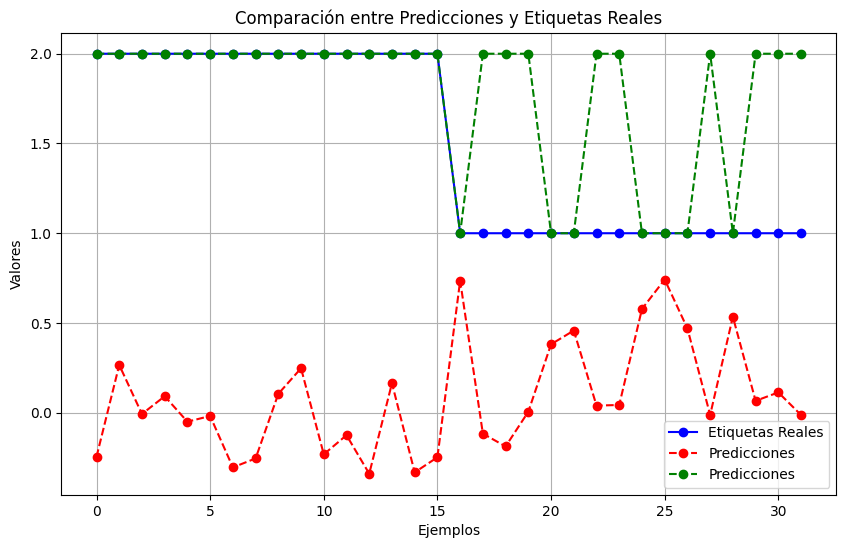

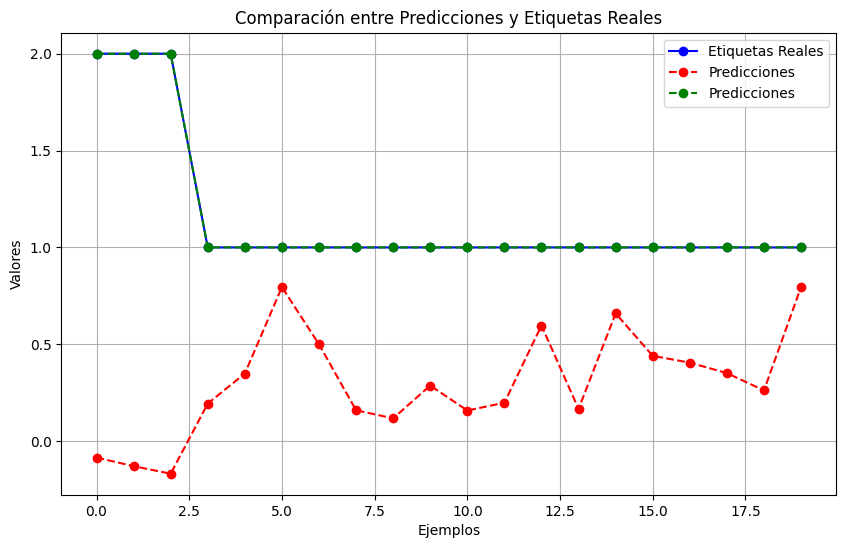

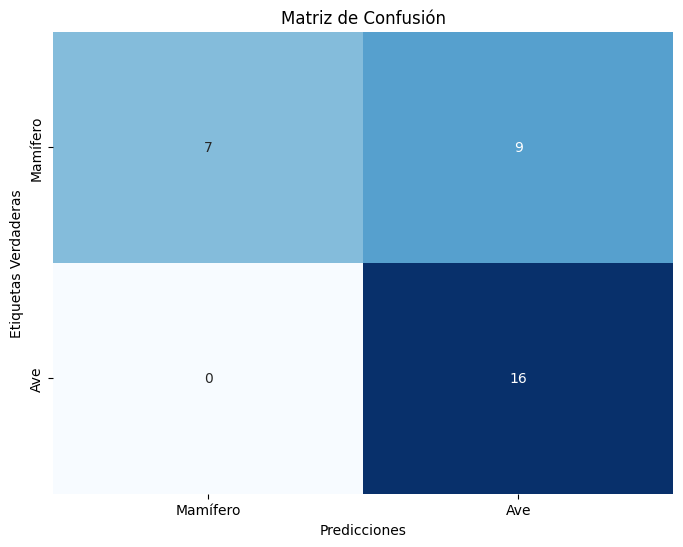

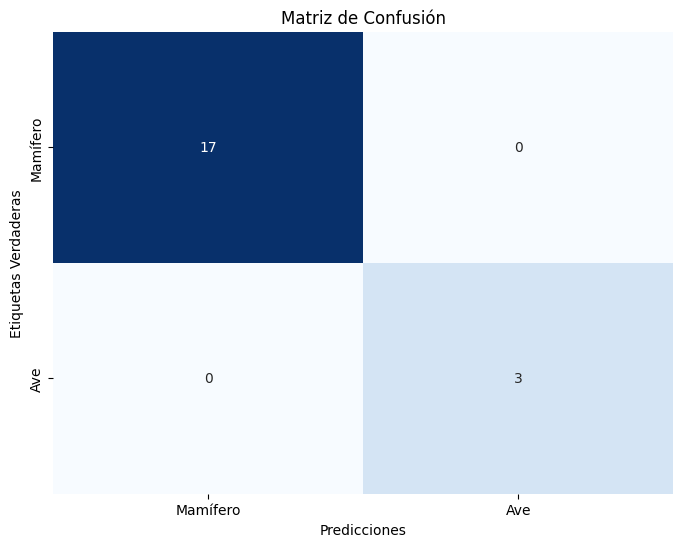

In [120]:
#cambio de valores 2 -> -1
y_train_percetron = np.copy(y_train)
y_train_percetron[y_train_percetron == 2] = -1

# Inicializar pesos en cero
w = np.zeros(x_train.shape[1])

# Inicializar variables para el seguimiento
mejor_w = np.copy(w)
min_clasificaciones_correctas = 0
clasificaciones_correctas = []

# tasa de aprendizaje
eta = 0.1

# Entrenamiento del perceptrón de bolsillo
n_clasificaciones_correctas = 0
while n_clasificaciones_correctas < 32:
    clasificaciones_correctas.append(n_clasificaciones_correctas)

    indice_aleatorio = np.random.randint(0, len(x_train))
    xi = x_train[indice_aleatorio]
    yi = y_train_percetron[indice_aleatorio]

    # Calcular la salida estimada = entrada * pesos
    if np.dot(xi, w)*yi > 0:
      n_clasificaciones_correctas += 1

      # Actualizar el mínimo número de clasificaciones correctas y los mejores pesos
      if n_clasificaciones_correctas > min_clasificaciones_correctas:
          min_clasificaciones_correctas = n_clasificaciones_correctas
          mejor_w = np.copy(w)
    # Actualizar los pesos
    else:
      w = w + xi*yi*eta
      n_clasificaciones_correctas=0

# Pesos finales del perceptrón de bolsillo
print("Pesos finales del perceptrón de bolsillo:", mejor_w)

# Graficar las clasificaciones correctas
indices = np.arange(len(clasificaciones_correctas[-100:]))
plt.figure(figsize=(10, 6))
plt.plot(indices, clasificaciones_correctas[-100:], marker='o', linestyle='-', color='b', label='numero de clasificaciones correctas')
plt.xlabel('Ultimas 100 iteraciones')
plt.ylabel('clasificaciones correctas')
plt.title('Ultimas 100 iteraciones de clasificaciones')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las predicciones y las etiquetas reales
predicciones =  np.dot(x_test, mejor_w)*3
predicciones_ajustadas = [2 if valor <= max(predicciones[0:3]) else 1 for valor in predicciones]

predicciones_train = np.dot(x_train, mejor_w)*3
predicciones_ajustadas_train = [2 if valor <= max(predicciones_train[0:16]) else 1 for valor in predicciones_train]


# Calcula la matriz de confusión para entrenamiento
confusion_train = confusion_matrix(y_train, predicciones_ajustadas_train)
accuracy = (confusion_train[0, 0] + confusion_train[1, 1]) / sum(sum(confusion_train))*100
print("Accuracy entrenamiento:", accuracy,"%")

# Calcula la matriz de confusión para prueba
confusion = confusion_matrix(y_test, predicciones_ajustadas)
accuracy = (confusion[0, 0] + confusion[1, 1]) / sum(sum(confusion))*100
print("Accuracy prueba:", accuracy,"%")

# Graficar las predicciones y las etiquetas reales del entrenamiento
indices = np.arange(len(y_train))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_train, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
plt.plot(indices, predicciones_train, marker='o', linestyle='--', color='r', label='Predicciones')
plt.plot(indices, predicciones_ajustadas_train, marker='o', linestyle='--', color='g', label='Predicciones')
plt.xlabel('Ejemplos')
plt.ylabel('Valores')
plt.title('Comparación entre Predicciones y Etiquetas Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las predicciones y las etiquetas reales de la prueba
indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
plt.plot(indices, predicciones, marker='o', linestyle='--', color='r', label='Predicciones')
plt.plot(indices, predicciones_ajustadas, marker='o', linestyle='--', color='g', label='Predicciones')
plt.xlabel('Ejemplos')
plt.ylabel('Valores')
plt.title('Comparación entre Predicciones y Etiquetas Reales')
plt.legend()
plt.grid(True)
plt.show()


# Calcula la matriz de confusión de prueba
confusion = confusion_matrix(y_test, predicciones_ajustadas)

# Calcula la matriz de confusión de entrenamiento
confusion_train = confusion_matrix(y_train, predicciones_ajustadas_train)

# Crea un mapa de calor (heatmap) de la matriz de confusión de entrenamiento
class_labels = ["Mamífero","Ave"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de Confusión")
plt.show()

# Crea un mapa de calor (heatmap) de la matriz de confusión deprueba
class_labels = ["Mamífero","Ave"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de Confusión")
plt.show()

# ***Punto 3 Percetron multicapa***

In [94]:
# Separar el DataFrame en dos DataFrames basados en la columna "Clase Entrega 1"
df_Artiodactyla = df[df["Clase Entrega 3"] == 1]
df_Ave = df[df["Clase Entrega 3"] == 2]
df_Carnivora = df[df["Clase Entrega 3"] == 3]
df_Cingulata = df[df["Clase Entrega 3"] == 4]
df_Pilosa = df[df["Clase Entrega 3"] == 5]
df_Rodentia = df[df["Clase Entrega 3"] == 6]

# Definir el tamaño del conjunto de prueba (90% entrenamiento, 10% prueba)
test_size = 0.2

# Obtener el número de filas para el conjunto de prueba
num_rows_test_Artiodactyla = int(len(df_Artiodactyla) * test_size)
num_rows_test_Ave = int(len(df_Ave) * test_size)
num_rows_test_Carnivora = int(len(df_Carnivora) * test_size)
num_rows_test_Cingulata = int(len(df_Cingulata) * test_size)
num_rows_test_Pilosa = int(len(df_Pilosa) * test_size)
num_rows_test_Rodentia = int(len(df_Rodentia) * test_size)

# Dividir en conjuntos de entrenamiento y prueba
train_df_Artiodactyla = df_Artiodactyla.iloc[num_rows_test_Artiodactyla:]
test_df_Artiodactyla = df_Artiodactyla.iloc[:num_rows_test_Artiodactyla]

train_df_Ave = df_Ave.iloc[num_rows_test_Ave:]
test_df_Ave = df_Ave.iloc[:num_rows_test_Ave]

train_df_Carnivora = df_Carnivora.iloc[num_rows_test_Carnivora:]
test_df_Carnivora = df_Carnivora.iloc[:num_rows_test_Carnivora]

train_df_Cingulata = df_Cingulata.iloc[num_rows_test_Cingulata:]
test_df_Cingulata = df_Cingulata.iloc[:num_rows_test_Cingulata]

train_df_Pilosa = df_Pilosa.iloc[num_rows_test_Pilosa:]
test_df_Pilosa = df_Pilosa.iloc[:num_rows_test_Pilosa]

train_df_Rodentia = df_Rodentia.iloc[num_rows_test_Rodentia:]
test_df_Rodentia = df_Rodentia.iloc[:num_rows_test_Rodentia]

#juntar conjunto de entrenamiento
frames_train = [train_df_Artiodactyla, train_df_Ave, train_df_Carnivora, train_df_Cingulata, train_df_Pilosa, train_df_Rodentia]
frames_test = [test_df_Artiodactyla, test_df_Ave, test_df_Carnivora, test_df_Cingulata, test_df_Pilosa, test_df_Rodentia]
df_train = pd.concat(frames_train, ignore_index=True)
df_test = pd.concat(frames_test, ignore_index=True)

# Seleccionar las columnas para x_train Y x_test
columnas_x = ["Area", "Contraste", "Correlacion", "Energia", "PuntosExtremo", "bias"]
x_train = df_train[columnas_x].to_numpy()
x_test = df_test[columnas_x].to_numpy()

# Seleccionar la columna para y_train y y_test
columna_y = "Clase Entrega 3"
y_train = df_train[columna_y].to_numpy()
y_test = df_test[columna_y].to_numpy()
y_train -= 1  # Restar 1 para ajustar los valores al rango de 0 a 5
y_test -= 1

<ipython-input-95-b5a2284a8deb>:12: RuntimeWarning: invalid value encountered in divide
  return e_x / e_x.sum(axis=0, keepdims=True)


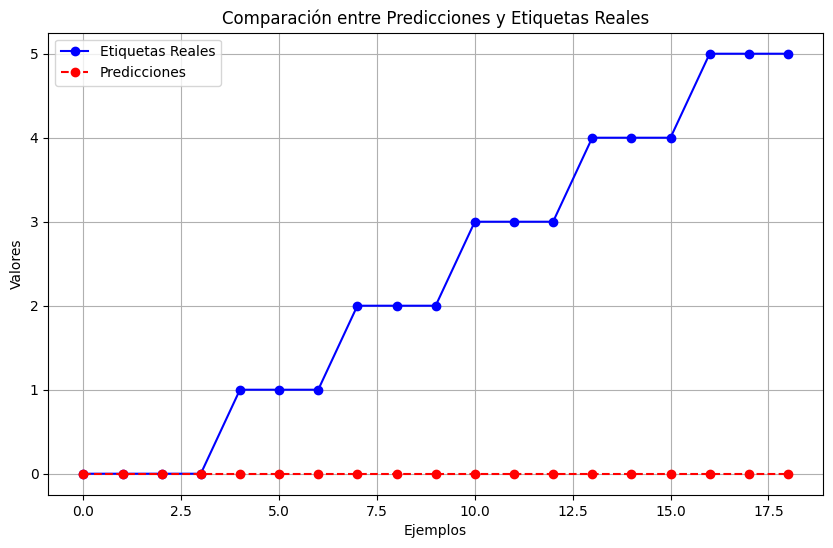

In [95]:
# Definición de la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Definición de la derivada de la función sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Función para realizar la operación de softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Evitar el desbordamiento numérico
    return e_x / e_x.sum(axis=0, keepdims=True)

# Datos de entrenamiento y etiquetas
# Asegúrate de tener x_train y y_train correctamente definidos aquí

# Inicialización de pesos con valores pequeños cerca de cero
input_size = 6  # Número de características por muestra
hidden_size1 = 4
hidden_size2 = 4
hidden_size3 = 5  # Número de neuronas en la tercera capa oculta
output_size = 6  # Número de clases

weights_input_hidden1 = np.random.uniform(-0.1, 0.1, size=(input_size, hidden_size1))
weights_hidden1_hidden2 = np.random.uniform(-0.1, 0.1, size=(hidden_size1, hidden_size2))
weights_hidden2_hidden3 = np.random.uniform(-0.1, 0.1, size=(hidden_size2, hidden_size3))
weights_hidden3_output = np.random.uniform(-0.1, 0.1, size=(hidden_size3, output_size))

# Inicialización de bias para las capas ocultas
bias_hidden1 = np.zeros((1, hidden_size1))
bias_hidden2 = np.zeros((1, hidden_size2))
bias_hidden3 = np.zeros((1, hidden_size3))

# Entrenamiento de la red neuronal
learning_rate = 0.1
epochs = 100000
y_train

for epoch in range(epochs):
    # Propagación hacia adelante
    hidden_layer1_input = np.dot(x_train, weights_input_hidden1) + bias_hidden1
    hidden_layer1_output = sigmoid(hidden_layer1_input)

    hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden_layer2_output = sigmoid(hidden_layer2_input)

    hidden_layer3_input = np.dot(hidden_layer2_output, weights_hidden2_hidden3) + bias_hidden3
    hidden_layer3_output = sigmoid(hidden_layer3_input)

    output_layer_input = np.dot(hidden_layer3_output, weights_hidden3_output)

    # Aplicamos la función softmax en la capa de salida
    output_layer_output = softmax(output_layer_input)

    # Cálculo del error
    y_train_onehot = np.eye(output_size)[y_train]  # Convertir a one-hot encoding
    error = y_train_onehot - output_layer_output

    # Retropropagación
    d_output = error  # No necesitas sigmoid_derivative en la capa de salida
    error_hidden_layer3 = d_output.dot(weights_hidden3_output.T)
    d_hidden_layer3 = error_hidden_layer3 * sigmoid_derivative(hidden_layer3_output)

    error_hidden_layer2 = d_hidden_layer3.dot(weights_hidden2_hidden3.T)
    d_hidden_layer2 = error_hidden_layer2 * sigmoid_derivative(hidden_layer2_output)

    error_hidden_layer1 = d_hidden_layer2.dot(weights_hidden1_hidden2.T)
    d_hidden_layer1 = error_hidden_layer1 * sigmoid_derivative(hidden_layer1_output)

    # Actualización de pesos y bias para las capas ocultas
    weights_hidden3_output += hidden_layer3_output.T.dot(d_output) * learning_rate
    bias_hidden3 += np.sum(d_hidden_layer3, axis=0, keepdims=True) * learning_rate

    weights_hidden2_hidden3 += hidden_layer2_output.T.dot(d_hidden_layer3) * learning_rate
    bias_hidden2 += np.sum(d_hidden_layer2, axis=0, keepdims=True) * learning_rate

    weights_hidden1_hidden2 += hidden_layer1_output.T.dot(d_hidden_layer2) * learning_rate
    bias_hidden1 += np.sum(d_hidden_layer1, axis=0, keepdims=True) * learning_rate

# Predicciones finales
final_hidden_layer1_input = np.dot(x_test, weights_input_hidden1) + bias_hidden1
final_hidden_layer1_output = sigmoid(final_hidden_layer1_input)

final_hidden_layer2_input = np.dot(final_hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
final_hidden_layer2_output = sigmoid(final_hidden_layer2_input)

final_hidden_layer3_input = np.dot(final_hidden_layer2_output, weights_hidden2_hidden3) + bias_hidden3
final_hidden_layer3_output = sigmoid(final_hidden_layer3_input)

final_output_layer_input = np.dot(final_hidden_layer3_output, weights_hidden3_output)

# Aplicamos la función softmax en la capa de salida
final_output_layer_output = softmax(final_output_layer_input)

# Clasificación de las muestras de prueba
predicciones_clase = np.argmax(final_output_layer_output, axis=1)

# Graficar las predicciones y las etiquetas reales
indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, marker='o', linestyle='-', color='b', label='Etiquetas Reales')
plt.plot(indices, predicciones_clase, marker='o', linestyle='--', color='r', label='Predicciones')
plt.xlabel('Ejemplos')
plt.ylabel('Valores')
plt.title('Comparación entre Predicciones y Etiquetas Reales')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
